# Visa - Dataset

# Objective

# 1. Load Python Modules

In [1]:
#  Use Python's import statement to load modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

# 2. Read the Dataset from CSV file  - Using Pandas

In [2]:
file_path=r"dataset/Visadataset.csv"
visa_df=pd.read_csv(file_path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [3]:
#drop - sensitive - non imp columns
print(visa_df["case_id"].nunique())
visa_df.drop("case_id",axis=1,inplace=True)

25480


# 3. Basic Inspection on given dataset

In [4]:
def basic_inspection_dataset(table):
    """Generates a basic inspection dataset from the given table."""
    
    print("top 5 rows - using head")
    print(table.head())
    print()
        
    print("bottom 5 rows using tail")
    print(table.tail())
    print()
        
    print("numbers of samples and columns")
    print(table.shape)
    print()
    
    print("numbers of samples ")
    print(len(table))
    print()
    
    print("numbers of entries in the data frame")
    print(table.size)
    print()
    
    print("Columns Names")
    print(table.columns)
    print()

    print("Columns dtypes")
    print(table.dtypes)
    print()
    
    print("Dataframe info")
    print(table.info())
    print()
    
    print()
    print("check the missing value in each column")
    print(table.isnull().sum())
          
    print()
    print("check the missing value in each column")
    print(table.isna().sum())

basic_inspection_dataset(visa_df)

top 5 rows - using head
  continent education_of_employee has_job_experience requires_job_training  \
0      Asia           High School                  N                     N   
1      Asia              Master's                  Y                     N   
2      Asia            Bachelor's                  N                     Y   
3      Asia            Bachelor's                  N                     N   
4    Africa              Master's                  Y                     N   

   no_of_employees  yr_of_estab region_of_employment  prevailing_wage  \
0            14513         2007                 West         592.2029   
1             2412         2002            Northeast       83425.6500   
2            44444         2008                 West      122996.8600   
3               98         1897                 West       83434.0300   
4             1082         2005                South      149907.3900   

  unit_of_wage full_time_position case_status  
0         Hour      

# 4. Handling Missing Values - Cat - Variables

In [5]:
# No Missing Values - I am skipping this section
visa_df.isnull().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

# 5. Categorical- Variable - Analysis -Using Pipeline

In [6]:
class BarPieChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        cat_cols = df.select_dtypes(include='object').columns
        for cat_name in cat_cols:
            value_counts = df[cat_name].value_counts().reset_index()
            # Rename the columns
            value_counts.columns = ['Class', 'Frequency']

            # Print the result as a table
            print(f"{cat_name} frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Calculate relative frequency
            total_count = value_counts['Frequency'].sum()
            value_counts['Relative Frequency %'] = round((value_counts['Frequency'] / total_count)*100,2)

            # Print the result as a table
            print(f"{cat_name} Relative frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Extract the values and index from value counts
            value_counts = df[cat_name].value_counts()
            values = value_counts.values
            labels = value_counts.index

            fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
            # Create a bar graph
            axs[0].bar(labels, values)
            axs[0].set_title(f'Frequency of {cat_name}')
            axs[0].set_xlabel('Categories')  # Set x-label
            axs[0].set_ylabel('Count')       # Set y-label

            axs[1].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
            axs[1].set_title(f'Relative Frequency of {cat_name}')
            plt.tight_layout()
            # Show the plot
            plt.show()  
        
        

continent frequency table
+---+---------------+-----------+
|   |     Class     | Frequency |
+---+---------------+-----------+
| 0 |     Asia      |   16861   |
| 1 |    Europe     |   3732    |
| 2 | North America |   3292    |
| 3 | South America |    852    |
| 4 |    Africa     |    551    |
| 5 |    Oceania    |    192    |
+---+---------------+-----------+
continent Relative frequency table
+---+---------------+-----------+----------------------+
|   |     Class     | Frequency | Relative Frequency % |
+---+---------------+-----------+----------------------+
| 0 |     Asia      |   16861   |        66.17         |
| 1 |    Europe     |   3732    |        14.65         |
| 2 | North America |   3292    |        12.92         |
| 3 | South America |    852    |         3.34         |
| 4 |    Africa     |    551    |         2.16         |
| 5 |    Oceania    |    192    |         0.75         |
+---+---------------+-----------+----------------------+


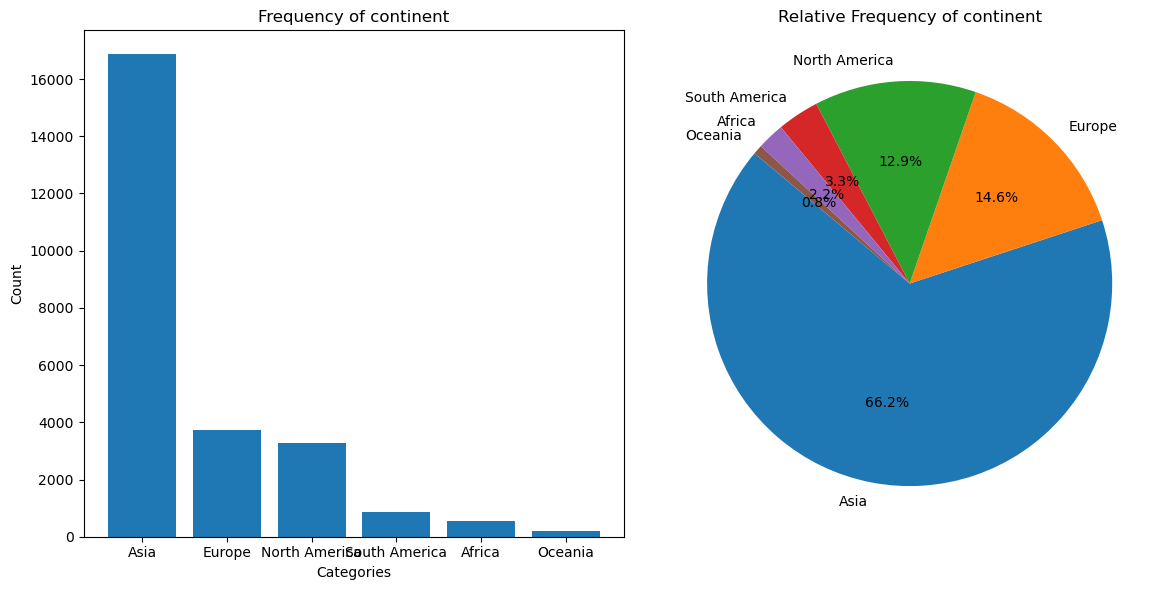

education_of_employee frequency table
+---+-------------+-----------+
|   |    Class    | Frequency |
+---+-------------+-----------+
| 0 | Bachelor's  |   10234   |
| 1 |  Master's   |   9634    |
| 2 | High School |   3420    |
| 3 |  Doctorate  |   2192    |
+---+-------------+-----------+
education_of_employee Relative frequency table
+---+-------------+-----------+----------------------+
|   |    Class    | Frequency | Relative Frequency % |
+---+-------------+-----------+----------------------+
| 0 | Bachelor's  |   10234   |        40.16         |
| 1 |  Master's   |   9634    |        37.81         |
| 2 | High School |   3420    |        13.42         |
| 3 |  Doctorate  |   2192    |         8.6          |
+---+-------------+-----------+----------------------+


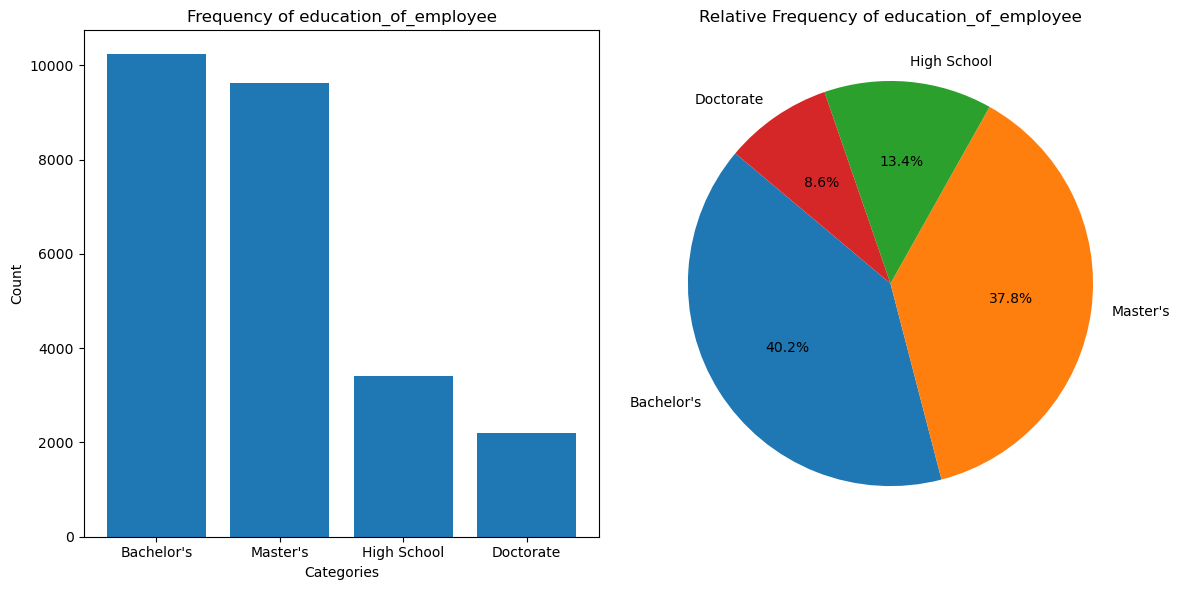

has_job_experience frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |   Y   |   14802   |
| 1 |   N   |   10678   |
+---+-------+-----------+
has_job_experience Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |   Y   |   14802   |        58.09         |
| 1 |   N   |   10678   |        41.91         |
+---+-------+-----------+----------------------+


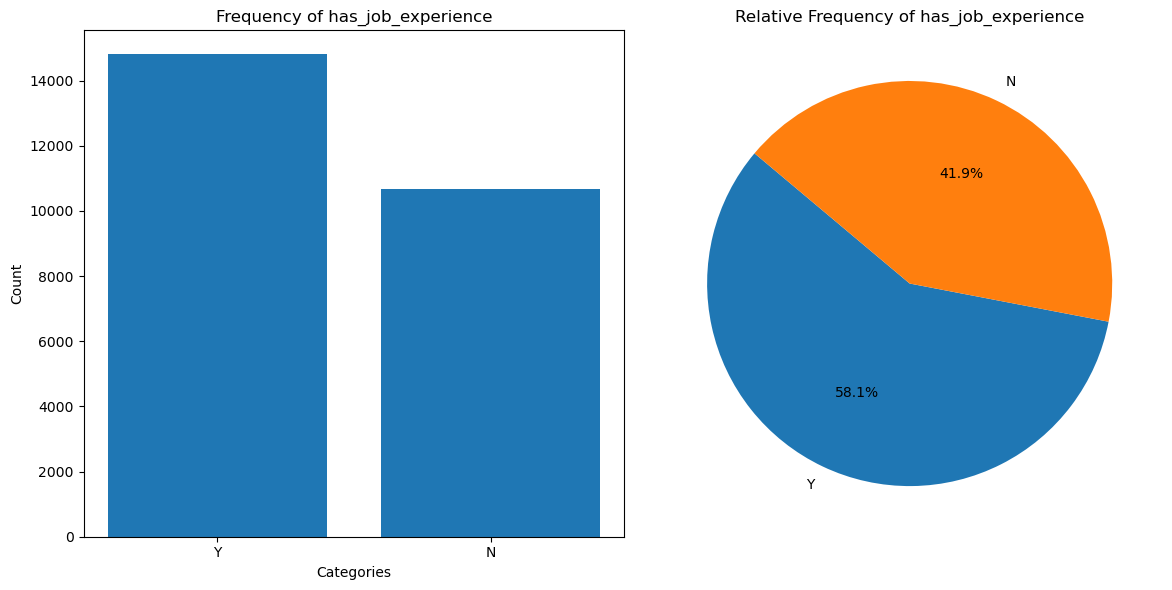

requires_job_training frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |   N   |   22525   |
| 1 |   Y   |   2955    |
+---+-------+-----------+
requires_job_training Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |   N   |   22525   |         88.4         |
| 1 |   Y   |   2955    |         11.6         |
+---+-------+-----------+----------------------+


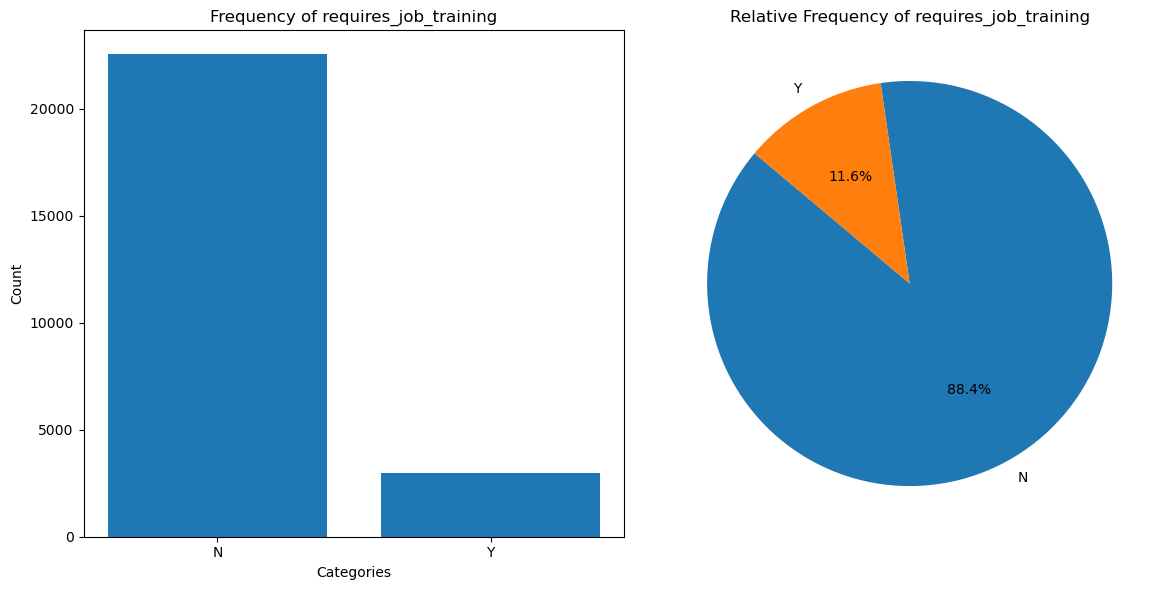

region_of_employment frequency table
+---+-----------+-----------+
|   |   Class   | Frequency |
+---+-----------+-----------+
| 0 | Northeast |   7195    |
| 1 |   South   |   7017    |
| 2 |   West    |   6586    |
| 3 |  Midwest  |   4307    |
| 4 |  Island   |    375    |
+---+-----------+-----------+
region_of_employment Relative frequency table
+---+-----------+-----------+----------------------+
|   |   Class   | Frequency | Relative Frequency % |
+---+-----------+-----------+----------------------+
| 0 | Northeast |   7195    |        28.24         |
| 1 |   South   |   7017    |        27.54         |
| 2 |   West    |   6586    |        25.85         |
| 3 |  Midwest  |   4307    |         16.9         |
| 4 |  Island   |    375    |         1.47         |
+---+-----------+-----------+----------------------+


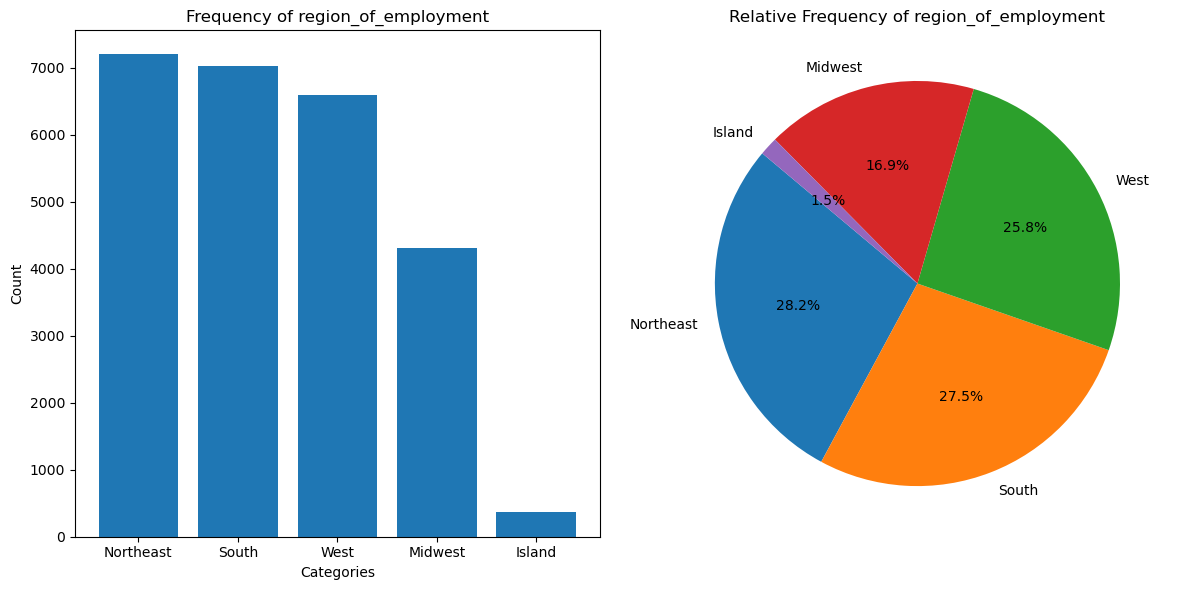

unit_of_wage frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 | Year  |   22962   |
| 1 | Hour  |   2157    |
| 2 | Week  |    272    |
| 3 | Month |    89     |
+---+-------+-----------+
unit_of_wage Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 | Year  |   22962   |        90.12         |
| 1 | Hour  |   2157    |         8.47         |
| 2 | Week  |    272    |         1.07         |
| 3 | Month |    89     |         0.35         |
+---+-------+-----------+----------------------+


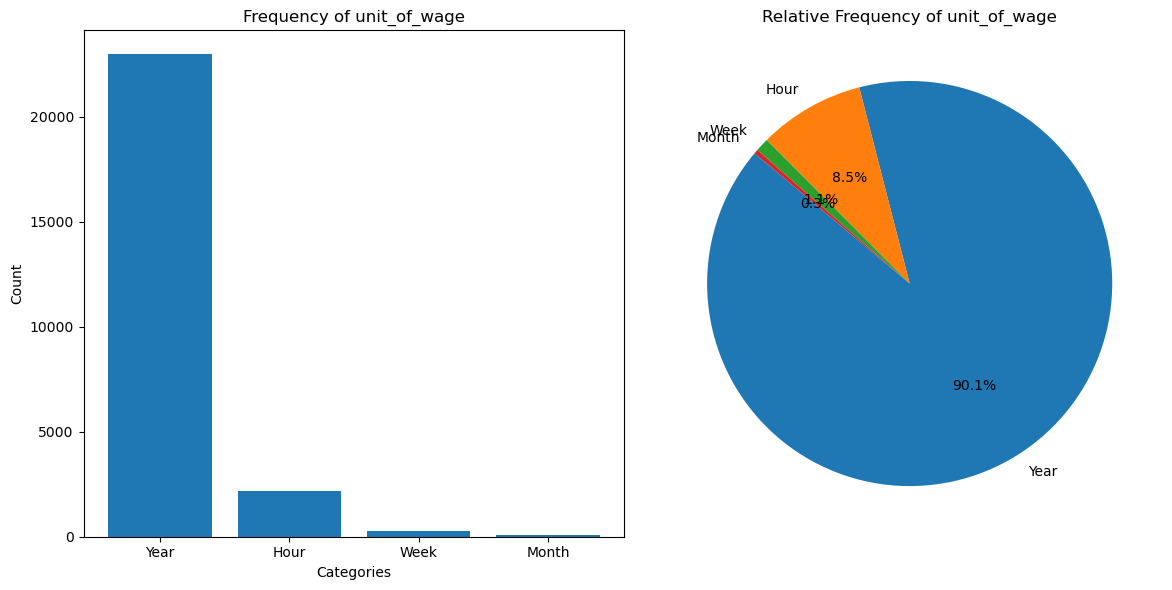

full_time_position frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |   Y   |   22773   |
| 1 |   N   |   2707    |
+---+-------+-----------+
full_time_position Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |   Y   |   22773   |        89.38         |
| 1 |   N   |   2707    |        10.62         |
+---+-------+-----------+----------------------+


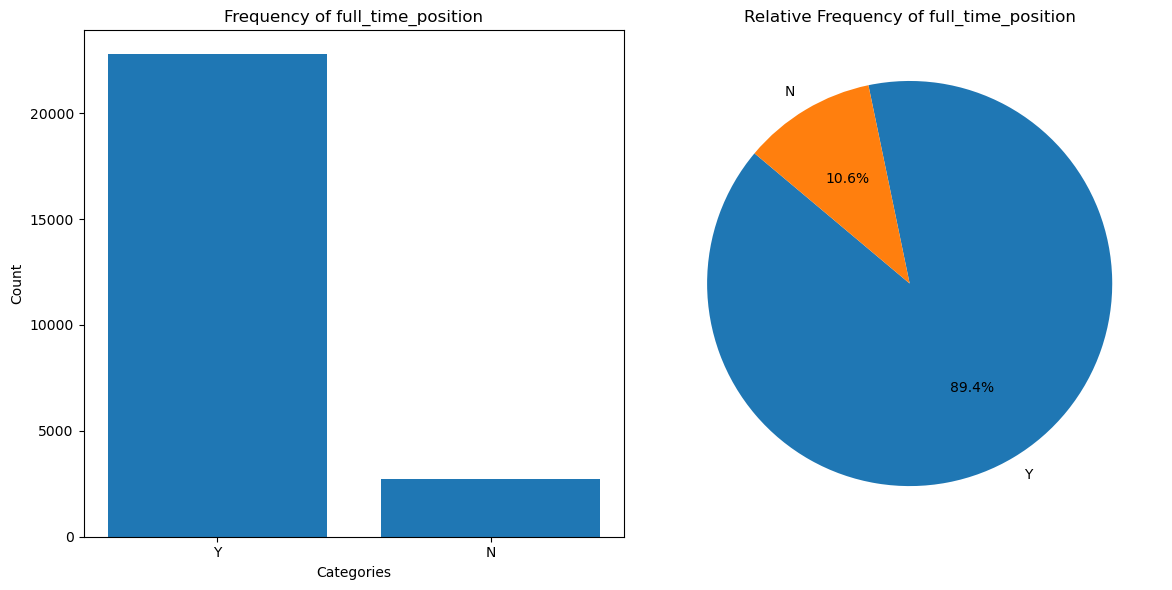

case_status frequency table
+---+-----------+-----------+
|   |   Class   | Frequency |
+---+-----------+-----------+
| 0 | Certified |   17018   |
| 1 |  Denied   |   8462    |
+---+-----------+-----------+
case_status Relative frequency table
+---+-----------+-----------+----------------------+
|   |   Class   | Frequency | Relative Frequency % |
+---+-----------+-----------+----------------------+
| 0 | Certified |   17018   |        66.79         |
| 1 |  Denied   |   8462    |        33.21         |
+---+-----------+-----------+----------------------+


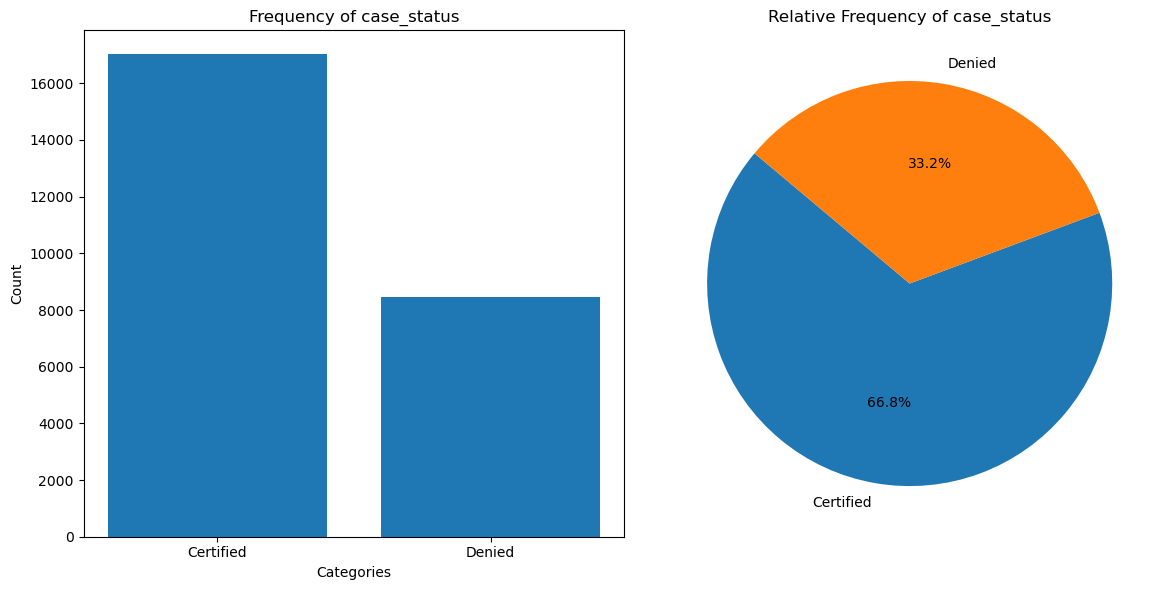

In [7]:
pipeline_cat_var = Pipeline([
    ('bar_pie_chart', BarPieChartTransformer())
])


# Fit and transform your data using the pipeline
processed_data = pipeline_cat_var.fit_transform(visa_df)

In [8]:
from scipy.stats import chi2_contingency
def chi2_test(cat_var,output_var):
    # Create a contingency table
    
    observed = pd.crosstab(visa_df[cat_var], visa_df[output_var])

    # Perform the chi-square test
    chi2_stat, p_val, dof, expected = chi2_contingency(observed)

    print("Chi-square statistic:", chi2_stat)
    print("P-value:", p_val)
    print("Degrees of freedom:", dof)
    print("==========================================")
    

In [9]:
cat_cols = visa_df.select_dtypes(include='object').columns
cat_cols= ['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position']
for i in cat_cols:
    chi2_test(i,"case_status")

Chi-square statistic: 351.3804080381529
P-value: 8.828798103147701e-74
Degrees of freedom: 5
Chi-square statistic: 2772.2072748211444
P-value: 0.0
Degrees of freedom: 3
Chi-square statistic: 940.058096285196
P-value: 1.9225604643165442e-206
Degrees of freedom: 1
Chi-square statistic: 1.7524844405674074
P-value: 0.18556470819406773
Degrees of freedom: 1
Chi-square statistic: 298.45083581476797
P-value: 2.3386641805054542e-63
Degrees of freedom: 4
Chi-square statistic: 1108.5070615816421
P-value: 5.19338536941224e-240
Degrees of freedom: 3
Chi-square statistic: 4.029931866713214
P-value: 0.0446997461068597
Degrees of freedom: 1


$Observations$
- There is no relation between - requires_job_training vs case_status

# 6. Handling Missing Values in Numerical Columns

In [10]:
visa_df.isnull().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

# 7. Numerical - Variables - Analysis - Using -Pipeline

In [11]:
class HistBoxChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        num_cols = df.select_dtypes(exclude='object').columns
        for con_var in num_cols:
            var_min = int(df[con_var].min())
            var_max = int(df[con_var].max())
            
            step = int(round((var_max-var_min)/10))
            bins = [x for x in range(var_min,var_max+1,step)]
            print(f"{con_var} bins {bins}")
            freq_table = pd.cut(df[con_var], bins=bins).value_counts().sort_index()

            table_frame = pd.DataFrame({
            'Interval': freq_table.index,
            'Frequency': freq_table.values,
            })
            print(f"Frequency Distribution Table for {con_var}:")


            # Print the result as a table
            print(tabulate(table_frame, headers='keys', tablefmt='pretty'))

            # Calculate relative frequency
            total_count = table_frame['Frequency'].sum()
            table_frame['Relative Frequency %'] = round((table_frame['Frequency'] / total_count)*100,2)
            # Print the result as a table
            print(f"Relative Frequency Distribution Table for {con_var}:")
            print(tabulate(table_frame, headers='keys', tablefmt='pretty'))
            
            
            # Create a figure and axes object
            fig, axes = plt.subplots(1, 2, figsize=(14, 6))

            # Plot histogram without KDE on the left
            axes[0].hist(df[con_var], bins=bins, color='skyblue', edgecolor='black')
            axes[0].set_xlabel('Value')
            axes[0].set_ylabel('Frequency')
            axes[0].set_title(f'Histogram {con_var}')

            # Plot histogram with KDE on the right
            sns.histplot(data=df, x=con_var, bins=bins, kde=True, color='orange', edgecolor='black', ax=axes[1])
            axes[1].set_xlabel('Value')
            axes[1].set_ylabel('Density')
            axes[1].set_title('Histogram with KDE')

            # Adjust layout
            plt.tight_layout()

            # Show the combined plot
            plt.show()


            sns.set_style("whitegrid")
            plt.figure(figsize=(10, 6))
            plt.title(f'Box-Plot - {con_var}')
            sns.boxplot(x=con_var, data=df)
            plt.show()


            sns.set_style("whitegrid")
            plt.figure(figsize=(10, 6))
            plt.title(f'Violin Plot - {con_var}')
            sns.violinplot(x=con_var, data=df)
            plt.show()
        
        

prevailing_wage bins [2, 31923, 63844, 95765, 127686, 159607, 191528, 223449, 255370, 287291]
Frequency Distribution Table for prevailing_wage:
+---+------------------+-----------+
|   |     Interval     | Frequency |
+---+------------------+-----------+
| 0 |    (2, 31923]    |   6038    |
| 1 |  (31923, 63844]  |   5504    |
| 2 |  (63844, 95765]  |   5681    |
| 3 | (95765, 127686]  |   4551    |
| 4 | (127686, 159607] |   2334    |
| 5 | (159607, 191528] |    624    |
| 6 | (191528, 223449] |    373    |
| 7 | (223449, 255370] |    240    |
| 8 | (255370, 287291] |    114    |
+---+------------------+-----------+
Relative Frequency Distribution Table for prevailing_wage:
+---+------------------+-----------+----------------------+
|   |     Interval     | Frequency | Relative Frequency % |
+---+------------------+-----------+----------------------+
| 0 |    (2, 31923]    |   6038    |        23.72         |
| 1 |  (31923, 63844]  |   5504    |        21.62         |
| 2 |  (63844, 9

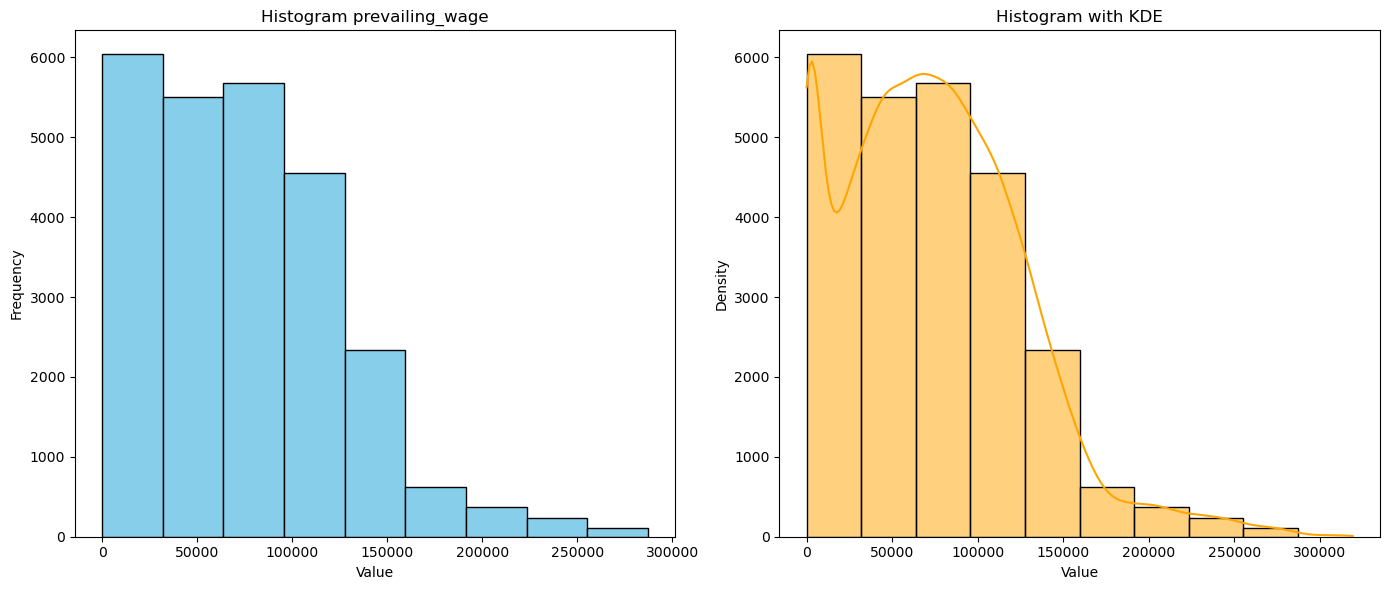

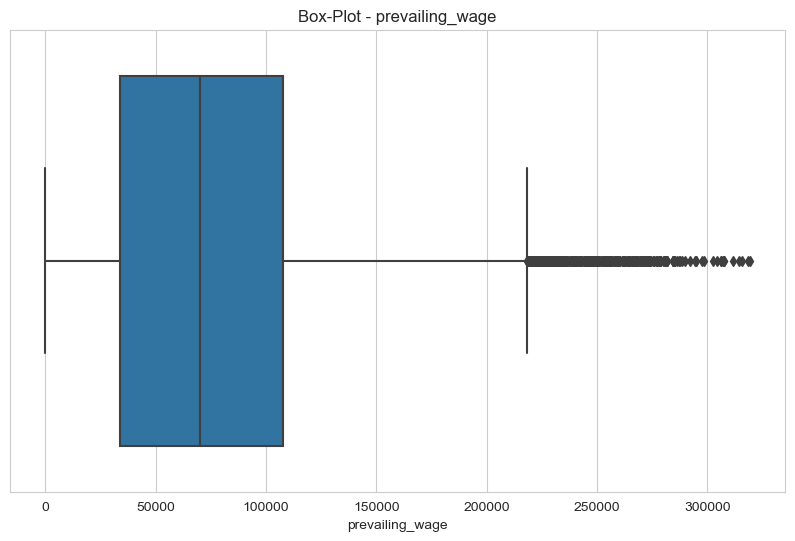

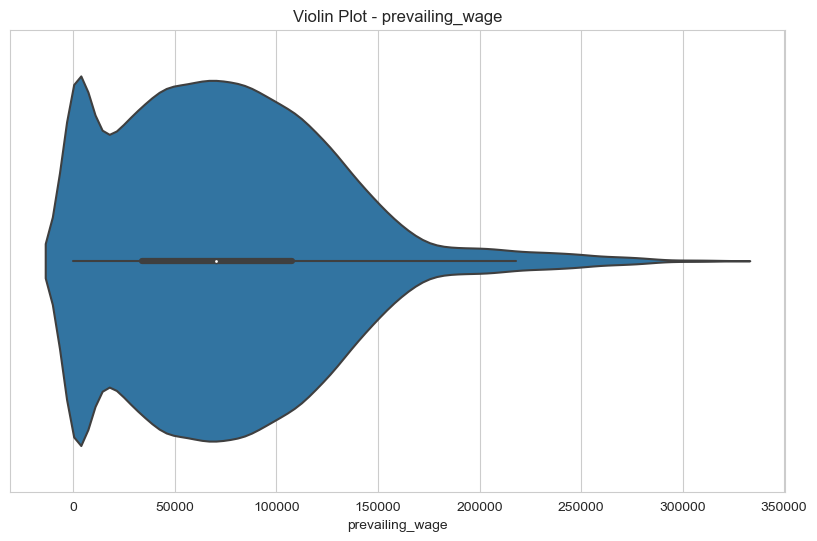

no_of_employees bins [-26, 60184, 120394, 180604, 240814, 301024, 361234, 421444, 481654, 541864]
Frequency Distribution Table for no_of_employees:
+---+------------------+-----------+
|   |     Interval     | Frequency |
+---+------------------+-----------+
| 0 |   (-26, 60184]   |   24963   |
| 1 | (60184, 120394]  |    341    |
| 2 | (120394, 180604] |    93     |
| 3 | (180604, 240814] |    19     |
| 4 | (240814, 301024] |    22     |
| 5 | (301024, 361234] |    10     |
| 6 | (361234, 421444] |    13     |
| 7 | (421444, 481654] |     5     |
| 8 | (481654, 541864] |     2     |
+---+------------------+-----------+
Relative Frequency Distribution Table for no_of_employees:
+---+------------------+-----------+----------------------+
|   |     Interval     | Frequency | Relative Frequency % |
+---+------------------+-----------+----------------------+
| 0 |   (-26, 60184]   |   24963   |        98.02         |
| 1 | (60184, 120394]  |    341    |         1.34         |
| 2 | (12039

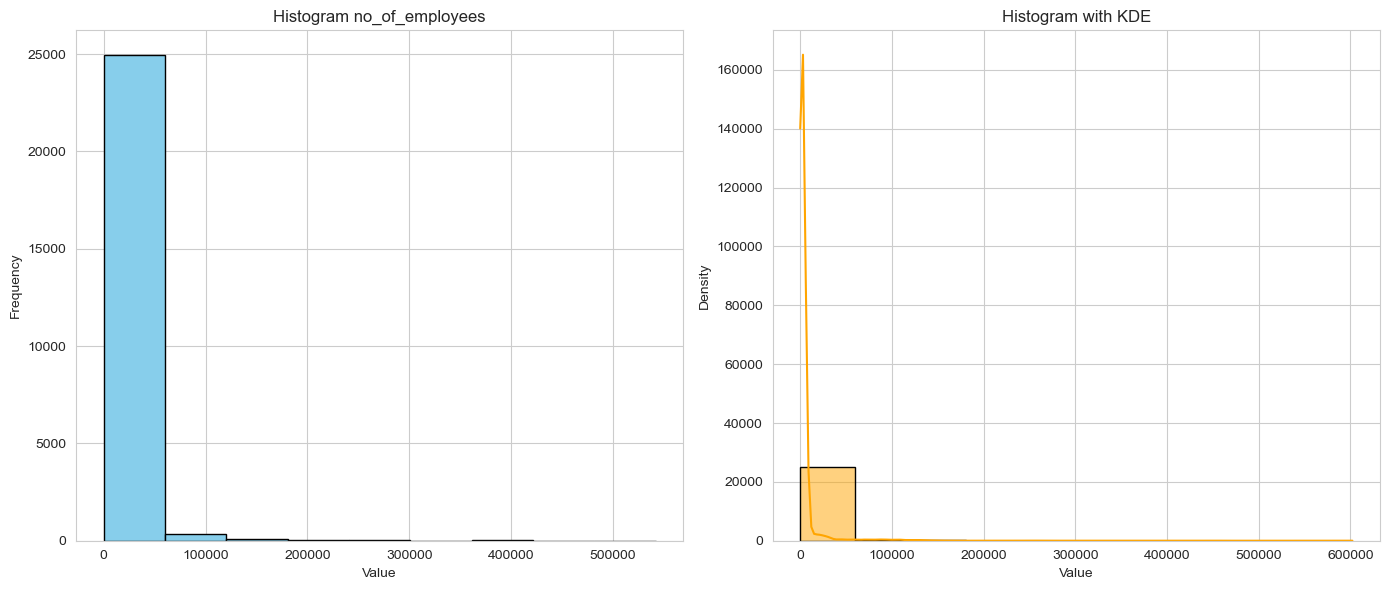

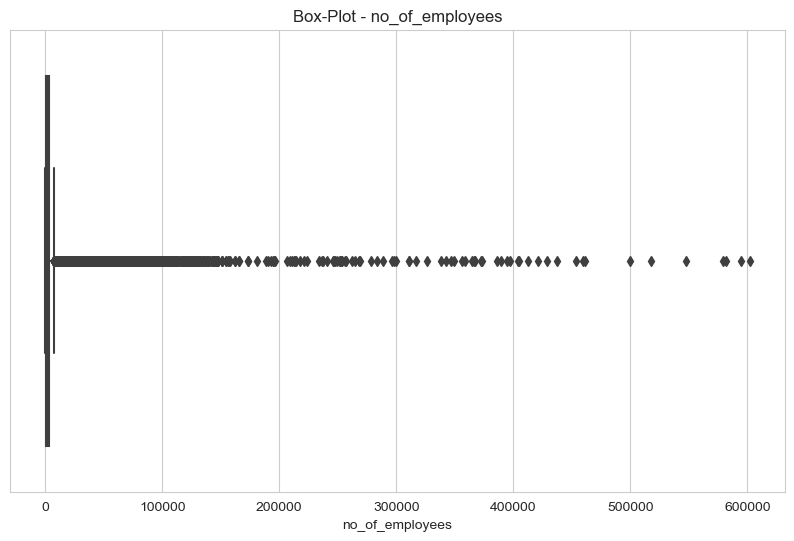

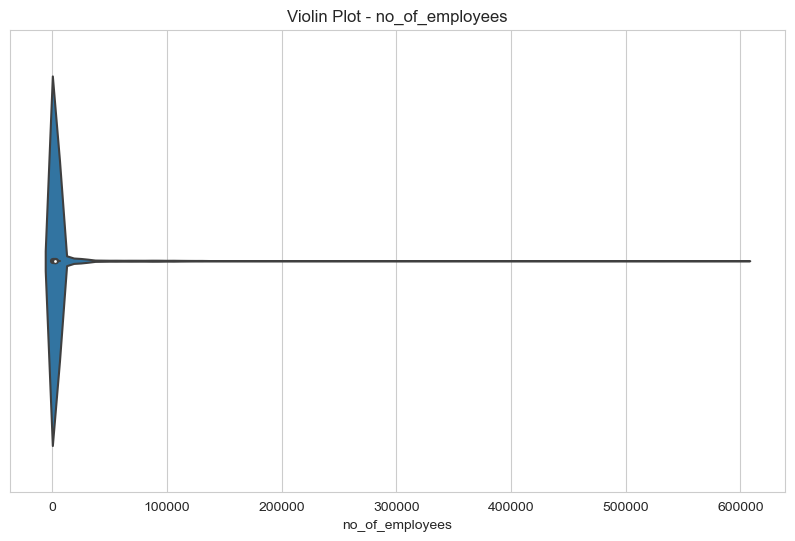

In [12]:

pipeline_num_var = Pipeline([
    ('hist_box_chart', HistBoxChartTransformer())
])

visa_num_df = visa_df[['prevailing_wage', 'no_of_employees']].copy()
# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(visa_num_df)

# 8. Numerical - Variables -Outliers Analysis

In [13]:
def find_outliers(con_var):
    """find outliers and remove the outliers from the dataset for given var - feature"""
    print(f"Original-dataset for {con_var} ,{len(visa_df)}")
    
    #plt.boxplot(visa_df[con_var])
    
    q1 = visa_df[con_var].quantile(0.25)
    q3 = visa_df[con_var].quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - (1.5*iqr)
    higher_fence = q3 + (1.5*iqr)

    cond1 = visa_df[con_var] > lower_fence
    cond2 = visa_df[con_var] < higher_fence

    df = visa_df[ cond1 & cond2]
    print(f"Modifed dataset len after removing the outliers- for {con_var},  {len(df)}")
    diff = len(visa_df) - len(df)
    print("Outliers observations length", diff)
    
    plt.figure(figsize=(10, 8))  # Adjust the figure size as needed


    plt.subplot(2, 2, 1)
    plt.boxplot(visa_df[con_var])
    plt.subplot(2, 2, 2)
    plt.hist(x=visa_df[con_var], bins=40)


    
    #filling with median
    median = visa_df[con_var].median()
    visa_df[con_var] = visa_df[con_var].map(lambda x: median if x < lower_fence  else x)
    visa_df[con_var] = visa_df[con_var].map(lambda x: median if x > higher_fence  else x)
    plt.subplot(2, 2, 3)
    plt.boxplot(visa_df[con_var])
    plt.subplot(2, 2, 4)
    plt.hist(x=visa_df[con_var], bins=40)
    
    plt.tight_layout()  # Adjust subplot parameters to give specified padding
    plt.show()

    
    

Original-dataset for prevailing_wage ,25480
Modifed dataset len after removing the outliers- for prevailing_wage,  25053
Outliers observations length 427


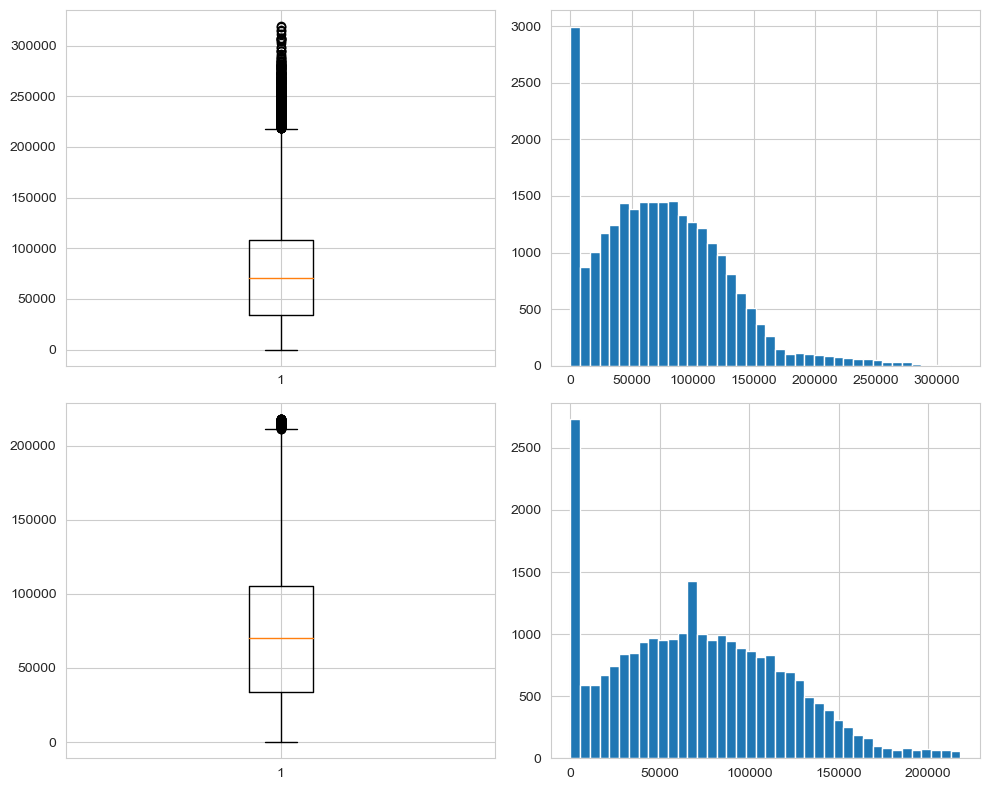

Original-dataset for no_of_employees ,25480
Modifed dataset len after removing the outliers- for no_of_employees,  23924
Outliers observations length 1556


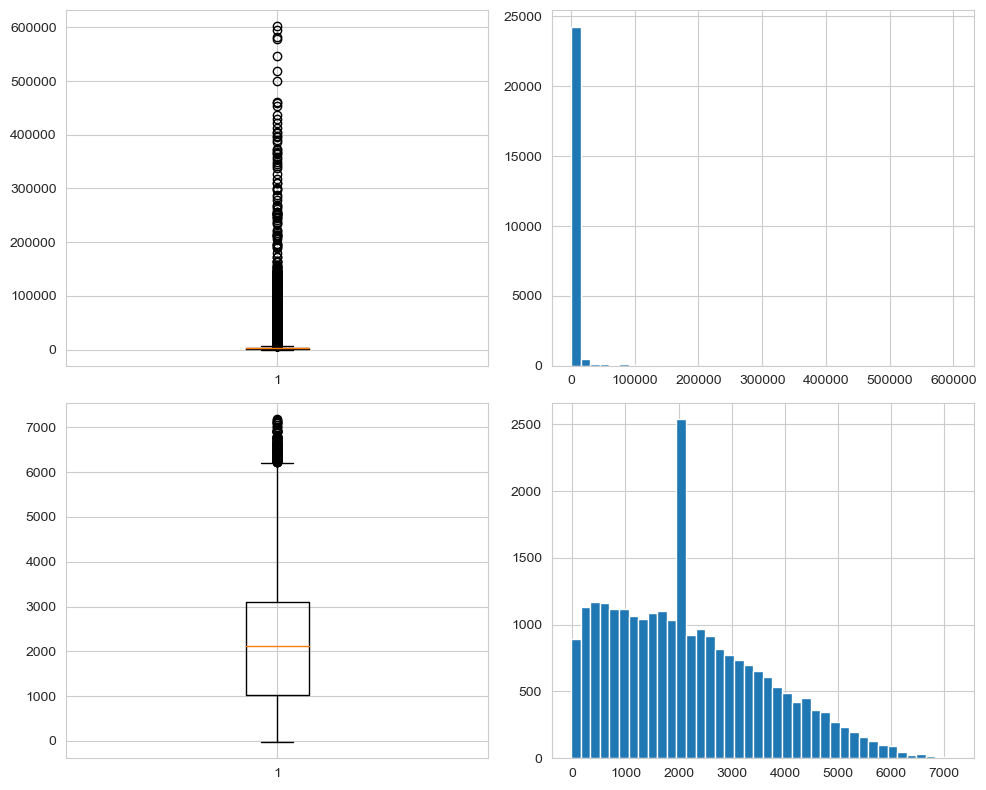

In [14]:
num_vars = ['prevailing_wage', 'no_of_employees']
for i in num_vars:
    find_outliers(i)

In [15]:
from scipy.stats import pointbiserialr
def point_biserial_test(con_var,output_var):
    # Extract the binary and continuous variables
    binary_variable = visa_df[output_var]
    continuous_variable = visa_df[con_var]

    # Compute the point biserial correlation coefficient
    point_biserial_corr, p_value = pointbiserialr(binary_variable, continuous_variable)

    print("Point biserial correlation coefficient:", point_biserial_corr)
    print("P-value:", p_value)

In [16]:
from sklearn.preprocessing import LabelEncoder
num_vars = ['prevailing_wage', 'no_of_employees']
label_encoder = LabelEncoder()
visa_df['case_status'] = label_encoder.fit_transform(visa_df['case_status'])
for var in num_vars:
    point_biserial_test(var,"case_status")
    print("=================================================")

Point biserial correlation coefficient: -0.07098817931249832
P-value: 7.833338375512404e-30
Point biserial correlation coefficient: -0.03343110449812929
P-value: 9.41561869280631e-08


$Observations$
- There is no co-relation between these to target variable

# 9. Bi Variate Analyis

In [17]:
visa_df.select_dtypes(include="object").columns
cat_vars = ['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position']

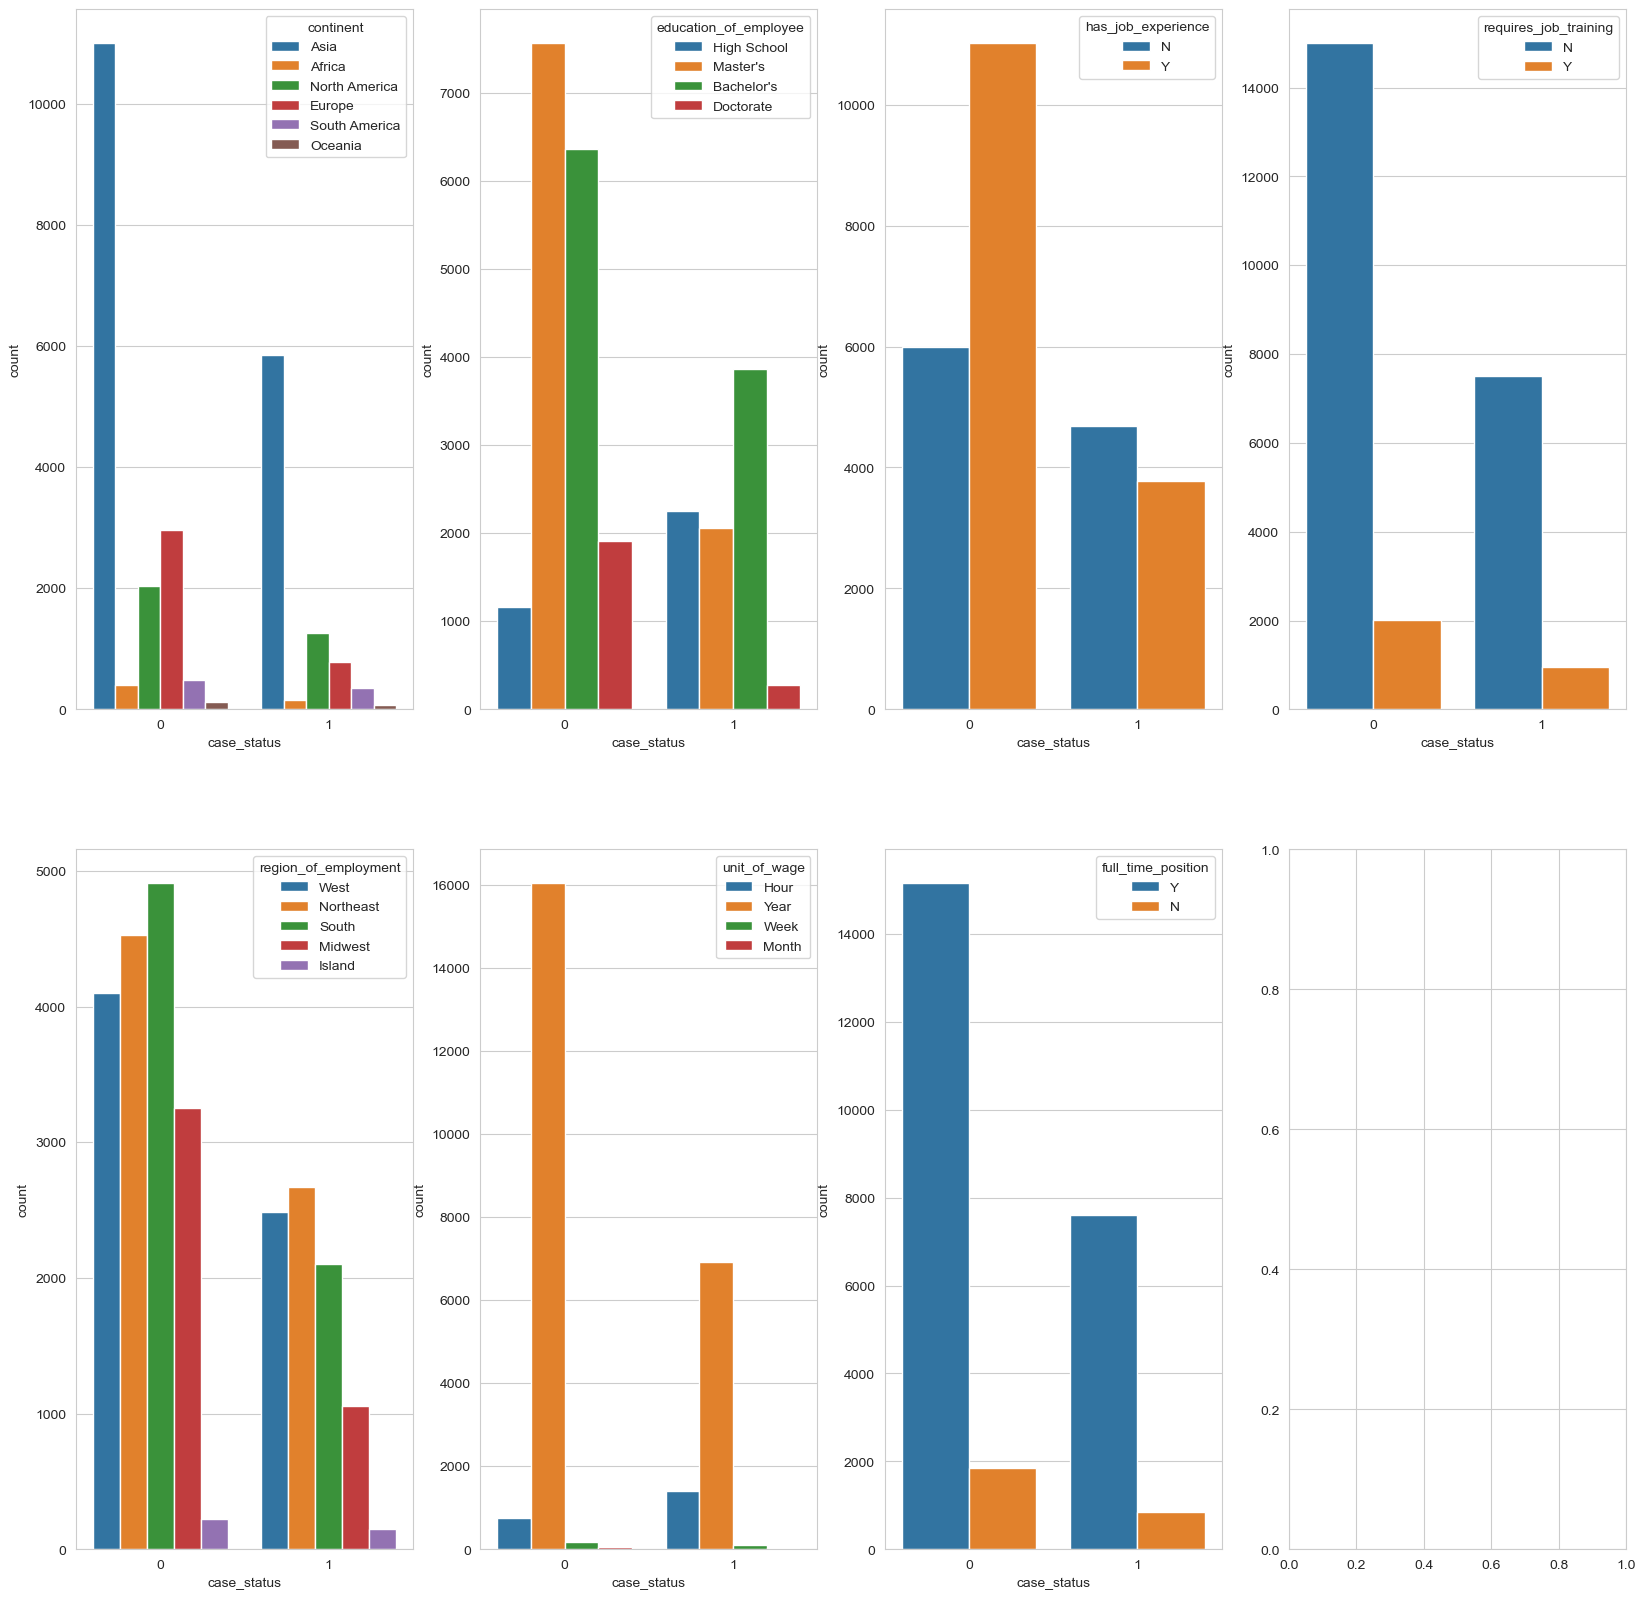

In [18]:
## Cat Vs Cat
output_var="case_status"
fig,ax = plt.subplots(2,4,figsize=(20,20))
for axi,x in zip(ax.flat,cat_vars):
    sns.countplot(x=output_var,hue=x,ax=axi , data=visa_df)

In [19]:
## Cat Vs Num
num_vars = ['prevailing_wage', 'no_of_employees']

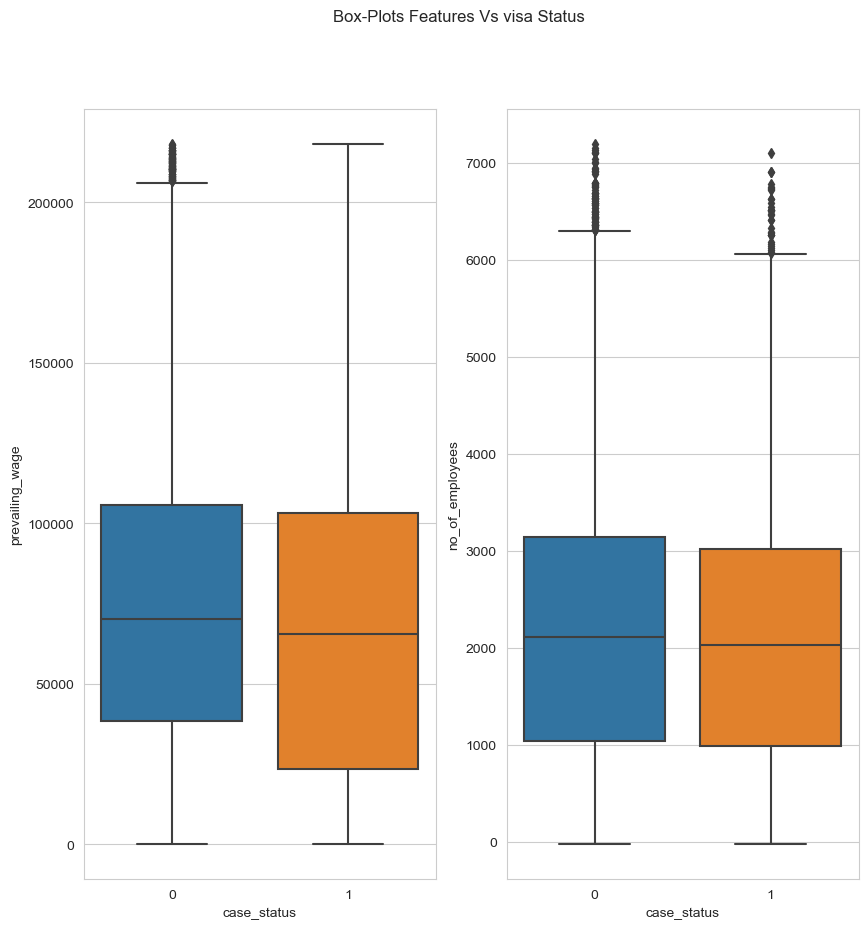

In [20]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
fig.suptitle('Box-Plots Features Vs visa Status')
sns.boxplot(ax=axes[0], x=output_var,y='prevailing_wage', data=visa_df)
sns.boxplot(ax=axes[1], x=output_var,y='no_of_employees', data=visa_df)
plt.show()

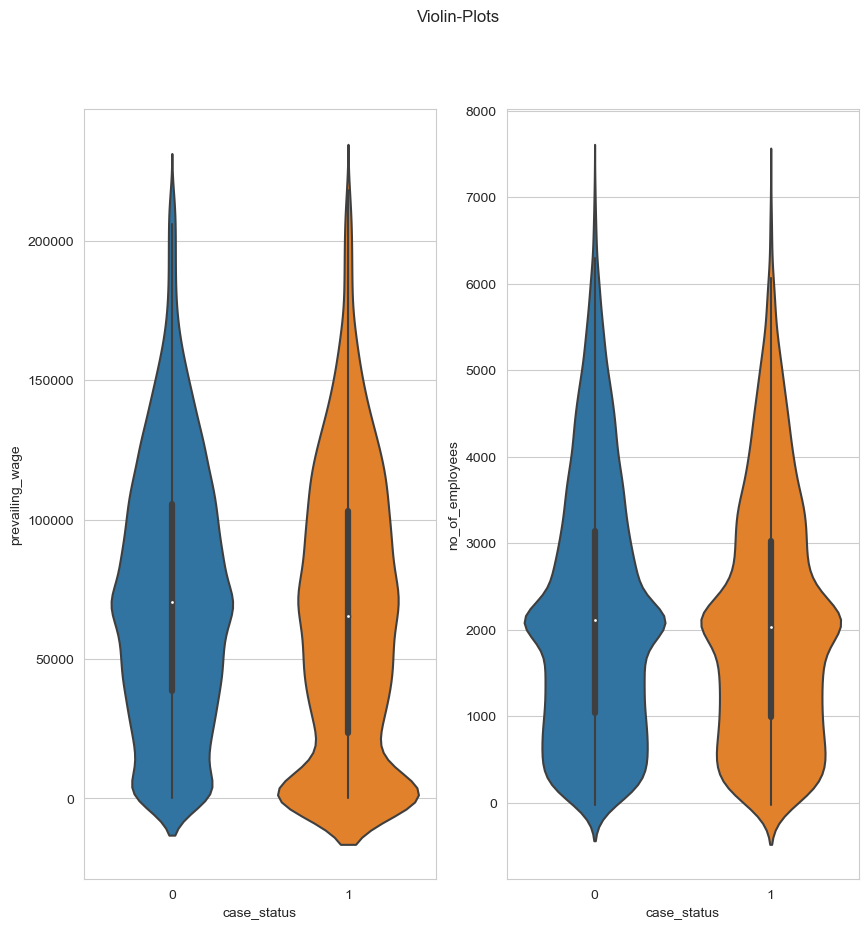

In [21]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
fig.suptitle('Violin-Plots')
sns.violinplot(ax=axes[0], x=output_var,y='prevailing_wage', data=visa_df)
sns.violinplot(ax=axes[1], x=output_var,y='no_of_employees', data=visa_df)
plt.show()

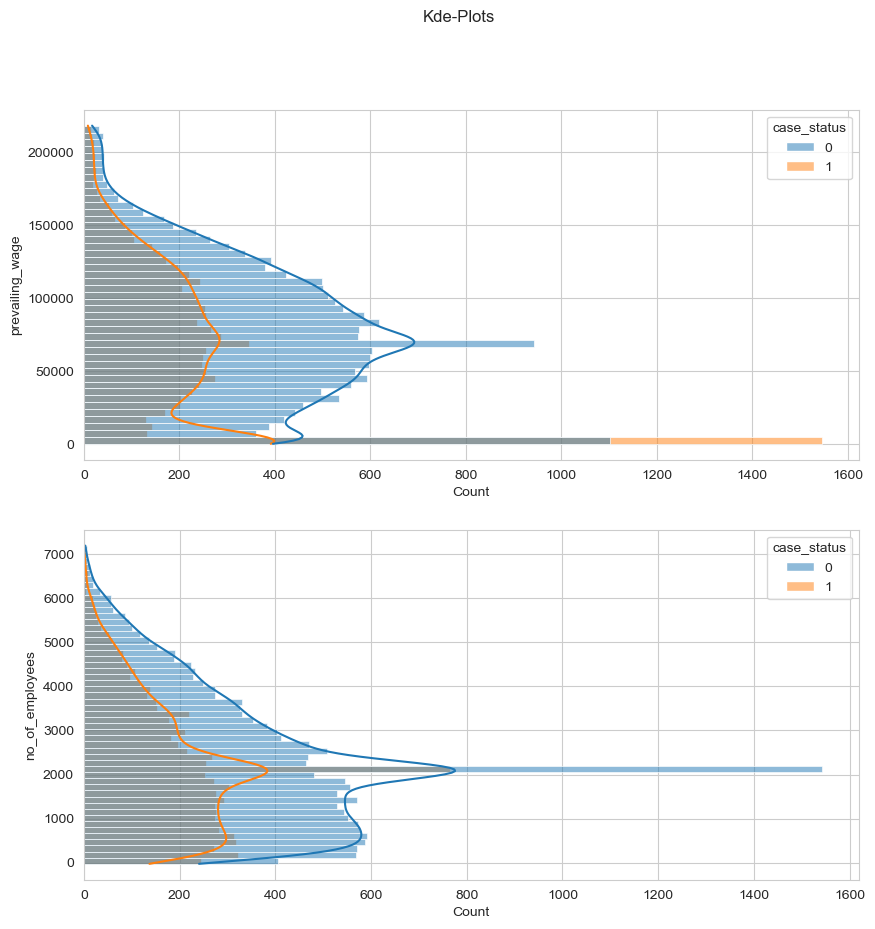

In [22]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle('Kde-Plots')
sns.histplot(ax=axes[0], hue=output_var,y='prevailing_wage', data=visa_df,kde=True)
sns.histplot(ax=axes[1], hue=output_var,y='no_of_employees', data=visa_df,kde=True)
plt.show()

In [23]:
## Num Vs Num

In [24]:
cat_vars=visa_df.select_dtypes(include="object").columns
cat_vars

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position'],
      dtype='object')

## Ch2 - test

In [25]:
cat_vars = ['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position']

output_var='case_status'

In [26]:
from scipy.stats import chi2_contingency
for var in cat_vars:
    col1=visa_df[var]
    col2=visa_df[output_var]
    cross_tab = pd.crosstab(col1,col2)
    # Perform Chi-square test
    chi2, p, dof, expected = chi2_contingency(cross_tab)

    # Output the results
    print("Chi-square statistic:", chi2)
    print("p-value:", p)
    print("Degrees of freedom:", dof)
    print("========================================")

Chi-square statistic: 351.3804080381529
p-value: 8.828798103147701e-74
Degrees of freedom: 5
Chi-square statistic: 2772.2072748211444
p-value: 0.0
Degrees of freedom: 3
Chi-square statistic: 940.058096285196
p-value: 1.9225604643165442e-206
Degrees of freedom: 1
Chi-square statistic: 1.7524844405674074
p-value: 0.18556470819406773
Degrees of freedom: 1
Chi-square statistic: 298.45083581476797
p-value: 2.3386641805054542e-63
Degrees of freedom: 4
Chi-square statistic: 1108.5070615816421
p-value: 5.19338536941224e-240
Degrees of freedom: 3
Chi-square statistic: 4.029931866713214
p-value: 0.0446997461068597
Degrees of freedom: 1


In [27]:
visa_df[output_var].value_counts()

case_status
0    17018
1     8462
Name: count, dtype: int64

In [29]:
num_vars = ['prevailing_wage', 'no_of_employees']

In [28]:
def point_bi_serial_coeff(con_var):
    # Compute means for pass and fail
    mean_pass = visa_df[visa_df[output_var] == 0][con_var].mean()
    mean_fail = visa_df[visa_df[output_var] == 1][con_var].mean()

    # Compute standard deviation
    std = visa_df[con_var].std()

    # Compute number of cases
    n_pass = len(visa_df[visa_df[output_var] == 0])
    #print(n_pass)
    
    n_fail = len(visa_df) - n_pass
    n_total = len(visa_df)

    #print(mean_pass)
    #print(mean_fail)
    #print(std)
    #print(n_pass)
    #print(n_fail)
    #print(n_total)
    # Compute point-biserial correlation coefficient
    point_biserial_corr = (mean_pass - mean_fail) / (std) * np.sqrt((n_pass * n_fail) / (n_total**2 * (n_total - 1)))

    print("Point-biserial correlation coefficient:", point_biserial_corr)


In [30]:
for i in num_vars:
    point_bi_serial_coeff(i)

Point-biserial correlation coefficient: 0.000444719656728797
Point-biserial correlation coefficient: 0.000209435844959828


In [31]:
from scipy.stats import f_oneway
# Perform one-way ANOVA
f_statistic, p_value = f_oneway(visa_df['prevailing_wage'],  visa_df['no_of_employees'])

# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between group means.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between group means.")

F-statistic: 53872.32676496061
p-value: 0.0
Reject the null hypothesis. There is a significant difference between group means.


# 11. Correaltion Numerical Columns

                 no_of_employees  yr_of_estab  prevailing_wage
no_of_employees         1.000000     0.003445        -0.025877
yr_of_estab             0.003445     1.000000         0.015885
prevailing_wage        -0.025877     0.015885         1.000000


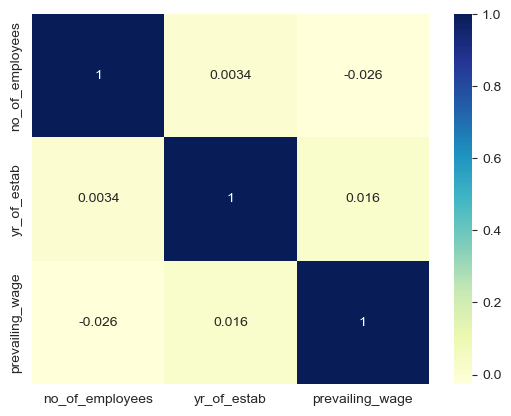

In [22]:
print(visa_df.corr(numeric_only=True))
sns.heatmap(visa_df.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()